In [1]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import scipy
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import pandas_to_pybeh as pb
from cmlreaders import CMLReader, get_data_index
from plotting import *
from importlib import reload

In [2]:
rav_fr1 = np.load('ravlt_fr1.npy')
rav_fr = np.load('ravlt_fr_mturk_r.npy')
rav_cat = np.load('ravlt_catfr.npy')
cvl_fr1 = np.load('cvlt_fr.npy')
cvl_cat = np.load('cvlt_catfr.npy')

# RAVLT CVLT page 41-42 of RAVLT handbook
rav_cvl_n = 60
rav_cvl_r = .47
dist = scipy.stats.beta(rav_cvl_n/2 - 1, rav_cvl_n/2 - 1, loc=-1, scale=2)

rav_cvl_p = 2*dist.cdf(-abs(rav_cvl_r))
print(rav_cvl_p)
rs = np.array([rav_fr1[0], rav_cat[0], rav_fr[0], cvl_fr1[0], cvl_cat[0], rav_cvl_r])
ns = np.array([rav_fr1[1], rav_cat[1], rav_fr[2], cvl_fr1[1], cvl_cat[1], rav_cvl_n])
rprime=np.arctanh(rs)
sprime=1/np.sqrt(ns - 3)
u = rprime+1.96*sprime
l = rprime-1.96*sprime
u = np.tanh(u)
l = np.tanh(l)

comparisons = ['RAVLT v. FR1', 'RAVLT v. catFR1', 'MTurk RAVLT vs MTurk FR', 'CVLT v. FR1', 'CVLT v. catFR1', 'RAVLT v. CVLT']
palette = ['C0','C0','C1','C0','C0','C2']

# r_array = np.array(rs)
# r_array = r_array.reshape(2,2).astype(str)


0.0001512928372403112


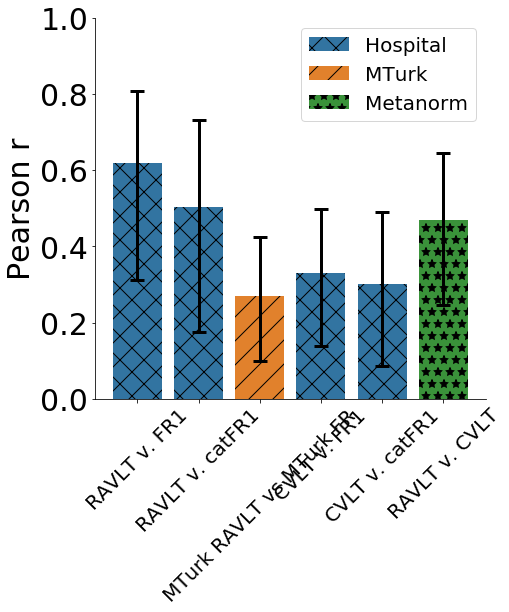

In [3]:
set_axes(fontsize=30, ylim=[0,1], yticks=np.arange(0,1.1, .2))
bar = sns.barplot(y = rs, x = comparisons, palette = palette)
plt.xticks(rotation=45, fontsize=20)
plt.ylabel('Pearson r')
plt.errorbar(x = comparisons, y = rs, yerr=[rs - l, u-rs], linestyle='', color = 'black', capsize= 7, capthick=3,elinewidth=3)
# plt.table(cellText = r_array)
# print(r_array)

bars = bar.patches
patterns = ('x', 'x', '/', 'x', 'x', '*')
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)
labels = ('Hospital', 'MTurk', 'Metanorm')
bars = [bars[x] for x in [0,2,5]]
for bar, label in zip(bars, labels):
    bar.set_label(label)
plt.legend(fontsize=20)
plt.savefig('figures/all_correlations.pdf', bbox_inches = 'tight')


In [4]:
for i, r in enumerate(rs):
    print(r, ns[i], comparisons[i])

0.6185302363767886 27.0 RAVLT v. FR1
0.5035284490270484 30.0 RAVLT v. catFR1
0.2702174279605392 125.0 MTurk RAVLT vs MTurk FR
0.3307191198023989 95.0 CVLT v. FR1
0.3010211600548855 79.0 CVLT v. catFR1
0.47 60.0 RAVLT v. CVLT


In [5]:
import sig_test_correlations as sig
reload(sig)
first = 0
second = 5
print('diff in rs', rs[first] - rs[second])
print(ns[first], ns[second])
sig.ind_btwn(rs[first], rs[second], ns[first], ns[second]), comparisons[first], comparisons[second]

diff in rs 0.14853023637678864
27.0 60.0
p = 0.3454998932836288
95%


((-0.1565972861137928, 0.4536577588673701), 'RAVLT v. FR1', 'RAVLT v. CVLT')